In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

### <b><span style='color:#f0bc22'> 1.</span> Loading data

In [ ]:
df=pd.read_excel('/content/sample_data/Assignment-1_Data.xlsx')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [ ]:
df.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


### <b><span style='color:#f0bc22'> 1-1. |</span> Membuang data yang memiliki nilai **`negative`** or **`zero quantity`**

In [ ]:
df[(df.Quantity<=0)].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4289,536764,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
6998,536996,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
6999,536997,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7000,536998,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


In [ ]:
df = df[~(df.Quantity<0)]
df[(df.Quantity<=0)].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


### <b><span style='color:#f0bc22'> 1-2. |</span> Membuang data yang memiliki nilai **`zero price`**

In [ ]:
df[(df.Price==0)].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1937,536545,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1938,536546,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1939,536547,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1940,536549,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
df = df[df['Price'] > 0]
df[(df.Price==0)].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


### <b><span style='color:#f0bc22'> 1-3. |</span> Membuang **`Non-product`** data.

In [ ]:
df.loc[(df['Itemname']=='POSTAGE')|(df['Itemname']=='DOTCOM POSTAGE')|(df['Itemname']=='Adjust bad debt')|(df['Itemname']=='Manual')].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
45,536370,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
377,536403,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1113,536527,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1781,536544,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom
2192,536569,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom


In [ ]:
df=df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

### <b><span style='color:#f0bc22'> 1-4. |</span> Filling **`null`** data

In [ ]:
df.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    130813
Country            0
dtype: int64

In [ ]:
df=df.fillna('-')
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

### <b><span style='color:#f0bc22'> 1-5. |</span> Membagi data menjadi **`year`** and **`month`**

In [ ]:
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['Year'] = df['Date'].apply(lambda x: x.split('.')[2])
df['Month'] = df['Date'].apply(lambda x: x.split('.')[1])
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010,2.55,17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6,01.12.2010,3.39,17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010,2.75,17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010,3.39,17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010,3.39,17850.0,United Kingdom,2010,12


### <b><span style='color:#f0bc22'> 1-7. |</span> Membuat kolom **`Total price`**

In [ ]:
df['Price'] = df['Price'].astype(str).str.replace(',', '.').astype(float)
df['Total price'] = df.Quantity * df.Price
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010,3.39,17850.0,United Kingdom,2010,12,20.34


<a id="section-two"></a>
## <b><span style='color:#f0bc22'> 2. |</span> Exploratoty Data Analysis

> ### Top 10 highest sales amount items

In [ ]:
cm=sns.light_palette("green",as_cmap=True)

item_sales=df.groupby('Itemname')['Price'].sum().sort_values(ascending=False)[:10]
item_sales.to_csv('item_sales.csv')
item_sales=pd.read_csv('item_sales.csv')
item_sales.style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Price
0,REGENCY CAKESTAND 3 TIER,27103.66
1,AMAZON FEE,13761.09
2,PARTY BUNTING,9741.13
3,SET OF 3 CAKE TINS PANTRY DESIGN,7965.63
4,CREAM SWEETHEART MINI CHEST,7384.51
5,WHITE HANGING HEART T-LIGHT HOLDER,7307.47
6,ENAMEL BREAD BIN CREAM,7041.13
7,SET/4 WHITE RETRO STORAGE CUBES,6861.20
8,RED RETROSPOT CAKE STAND,6668.39
9,IVORY KITCHEN SCALES,6518.76


> ### Top 10 most purchased items

In [ ]:
df[['Itemname','Quantity']].sort_values(by='Quantity',ascending=False)[:10].style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Quantity
520583,"PAPER CRAFT , LITTLE BIRDIE",80995
59999,MEDIUM CERAMIC TOP STORAGE JAR,74215
405138,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
198929,SMALL POPCORN HOLDER,4300
94245,EMPIRE DESIGN ROSETTE,3906
260928,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
51228,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
154834,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
416997,SMALL CHINESE STYLE SCISSOR,3000
280572,ASSORTED COLOUR BIRD ORNAMENT,2880


> ### Top 10 most frequently purchased items

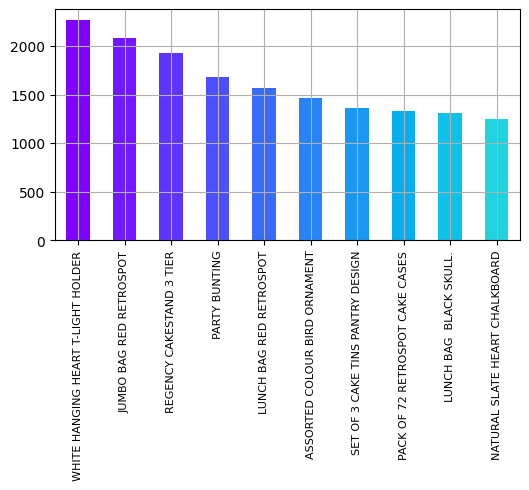

In [ ]:
color=plt.cm.rainbow(np.linspace(0,1,30))
df['Itemname'].value_counts().head(10).plot.bar(color=color,figsize=(6,3))
# plt.title('Frequency of Most popular items',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.show()

In [ ]:
country=df.groupby('Country')['Total price'].sum()
country.to_csv('country.csv')
country=pd.read_csv('country.csv')

fig=px.bar(country,x='Country',y='Total price',title='Sales amount in each country in 2021')
fig.update_layout(xaxis={'categoryorder':'total descending'},yaxis_title='Sales amount')
fig.show(5)

<a id="section-three"></a>
## <b><span style='color:#f0bc22'> 3. |</span> Market Basket Analysis

Karena Inggris adalah negara yang paling banyak melakukan pembelian, mari kita lihat kombinasi barang yang dibeli di Inggris.

### <b><span style='color:#f0bc22'> 3-1. |</span> Implementing Apriori

In [ ]:
df['Itemname']=df['Itemname'].str.strip()
df['BillNo']=df['BillNo'].astype('str')

In [ ]:
basket=(df[df['Country']=='United Kingdom']
        .groupby(['BillNo','Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('BillNo'))

In [ ]:
basket.head(3)

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

In [ ]:
basket_sets=basket.applymap(encode_units)

In [ ]:
frequent_itemsets=apriori(basket_sets,min_support=0.03,use_colnames=True)

In [ ]:
rules=round(association_rules(frequent_itemsets,metric='lift',min_threshold=1),2)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.05,0.05,0.03,0.64,12.38,0.03,2.65,0.97
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.05,0.05,0.03,0.61,12.38,0.03,2.41,0.97
2,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.04,0.05,0.03,0.72,14.39,0.03,3.41,0.97
3,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.05,0.04,0.03,0.60,14.39,0.03,2.41,0.98
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.82,15.77,0.03,5.28,0.97


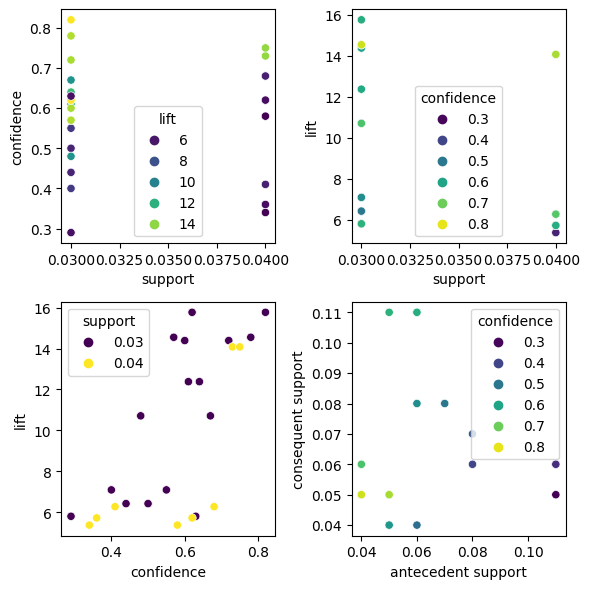

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.scatterplot(x="support",y="confidence",data=rules,hue="lift",palette="viridis")
plt.subplot(222)
sns.scatterplot(x="support",y="lift",data=rules,hue="confidence",palette="viridis")
plt.subplot(223)
sns.scatterplot(x="confidence",y="lift",data=rules,hue='support',palette="viridis")
plt.subplot(224)
sns.scatterplot(x="antecedent support",y="consequent support",data=rules,hue='confidence',palette="viridis")
plt.tight_layout()
plt.show()

### <b><span style='color:#f0bc22'> 3-2. |</span> The top 5 of the highest **`support`** value of items(antecedents)

> #### *Support(item) = Transactions comprising the item / Total transactions*

In [ ]:
rules[['antecedents','consequents','support']].sort_values('support',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,support
12,frozenset({'JUMBO SHOPPER VINTAGE RED PAISLEY'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.04
15,frozenset({'JUMBO STORAGE BAG SUKI'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.04
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.04
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.04
10,frozenset({'JUMBO BAG RED RETROSPOT'}),frozenset({'JUMBO BAG PINK POLKADOT'}),0.04


### <b><span style='color:#f0bc22'> 3-3. |</span> The top 5 of the highest **`confidence`** value of items

> #### *Confidence = Transactions comprising antecedent and consequent / Transactions comprising antecedent*

In [ ]:
rules[['antecedents','consequents','confidence']].sort_values('confidence',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,confidence
4,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.82
23,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.78
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.75
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.73
2,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),0.72


In the top confidence value of the purchase, it means that 82% of the customers who bought "PINK REGENCY TEACUP AND SAUCER" also bought "GREEN REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-4. |</span> The top 5 of the highest **`lift`** value of items

In [ ]:
rules[['antecedents','consequents','lift']].sort_values('lift',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,lift
4,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),15.77
5,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'PINK REGENCY TEACUP AND SAUCER'}),15.77
23,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),14.55
22,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'PINK REGENCY TEACUP AND SAUCER'}),14.55
2,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),14.39


In the top list value of the purchase, it means that customers are 15.7 times more likely to buy "GREEN REGENCY TEACUP AND SAUCER" if you sell "PINK REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-5. |</span> The best combination of the items

In [ ]:
rules[(rules['lift']>=13)&(rules['confidence']>=0.7)].sort_values('lift',ascending=False).style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.04,0.05,0.03,0.82,15.77,0.03,5.28,0.97
23,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.04,0.05,0.03,0.78,14.55,0.03,4.23,0.97
2,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),0.04,0.05,0.03,0.72,14.39,0.03,3.41,0.97
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.05,0.05,0.04,0.73,14.08,0.04,3.54,0.98
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.05,0.05,0.04,0.75,14.08,0.04,3.80,0.98


As you can see above, "REGENCY TEACUP AND SAUCER" have the best combination of the same items with different colors.

## Interactive Market Basket Analysis Visualization

In [ ]:
import plotly.express as px

# Convert frozensets to lists for serialization
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Create an interactive scatter plot using plotly express
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Analysis - Support vs. Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

# Customize the layout
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    coloraxis_colorbar_title='Lift',
    showlegend=True
)

# Show the interactive plot
fig.show()

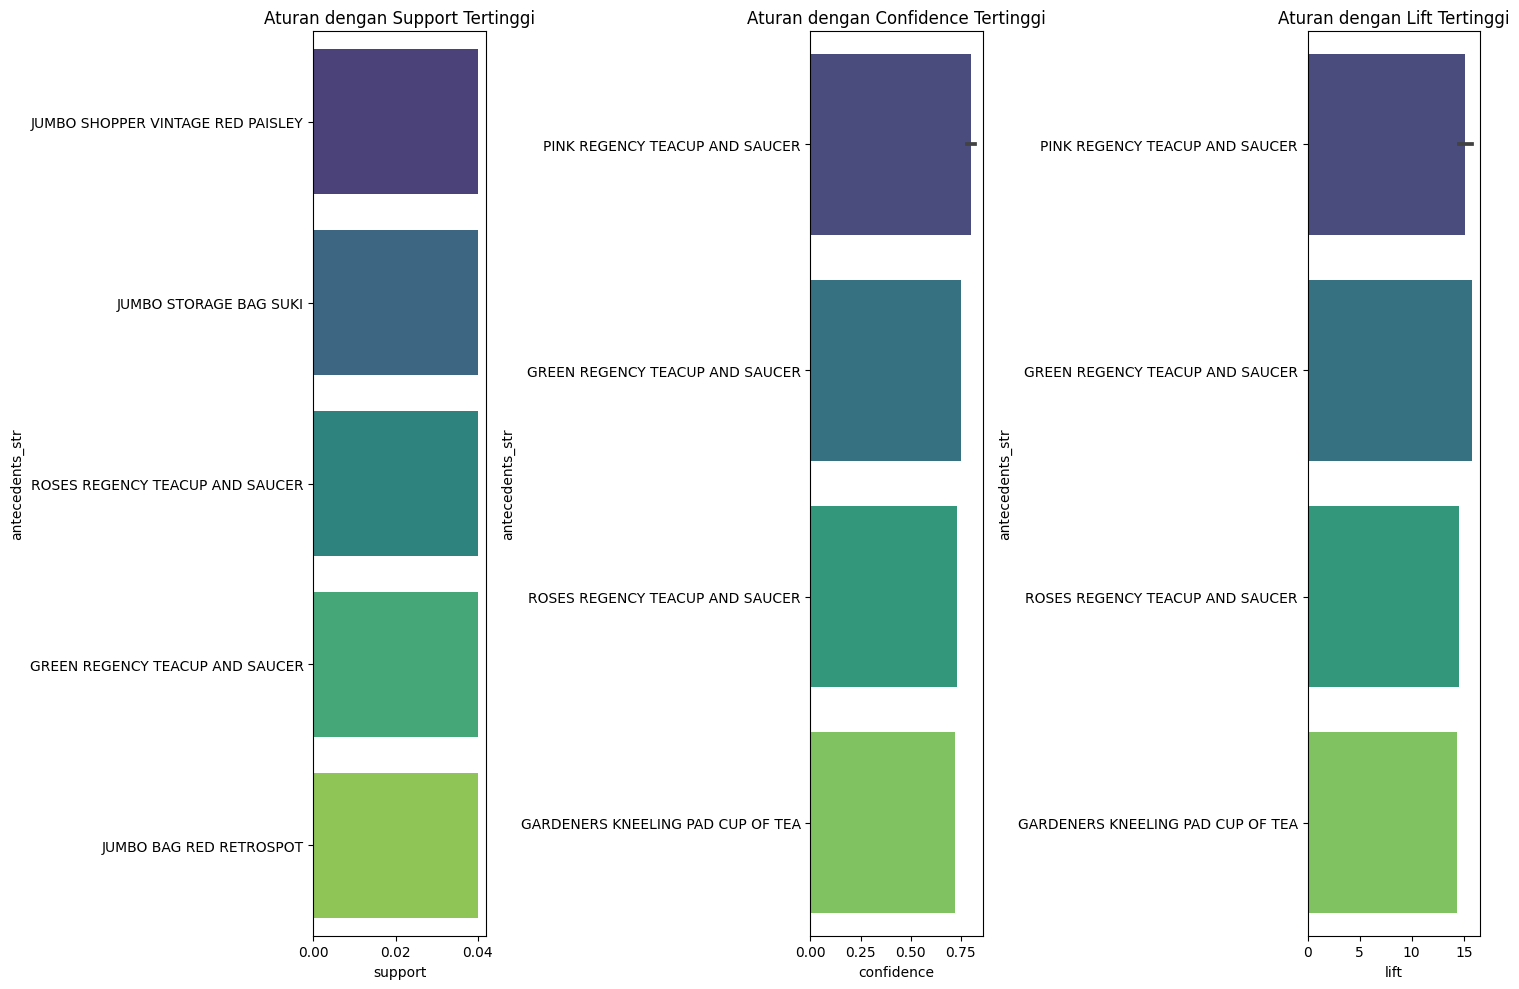

In [ ]:
# Visualisasi Aturan Asosiasi
plt.figure(figsize=(15, 10))

# Mengonversi antecedents menjadi string
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(x))

# Grafik batang untuk 5 aturan dengan support tertinggi
plt.subplot(131)
top_support = rules[['antecedents_str', 'consequents', 'support']].sort_values('support', ascending=False)[:5]
sns.barplot(x='support', y='antecedents_str', data=top_support, palette='viridis')
plt.title('Aturan dengan Support Tertinggi')

# Grafik batang untuk 5 aturan dengan confidence tertinggi
plt.subplot(132)
top_confidence = rules[['antecedents_str', 'consequents', 'confidence']].sort_values('confidence', ascending=False)[:5]
sns.barplot(x='confidence', y='antecedents_str', data=top_confidence, palette='viridis')
plt.title('Aturan dengan Confidence Tertinggi')

# Grafik batang untuk 5 aturan dengan lift tertinggi
plt.subplot(133)
top_lift = rules[['antecedents_str', 'consequents', 'lift']].sort_values('lift', ascending=False)[:5]
sns.barplot(x='lift', y='antecedents_str', data=top_lift, palette='viridis')
plt.title('Aturan dengan Lift Tertinggi')

plt.tight_layout()
plt.show()



<a id="section-four"></a>
## <b><span style='color:#f0bc22'> 4. |</span> Conclusion

Kesimpulan dari analisis :



*   Barang yang paling banyak dibeli adalah GREEN REGENCY TEACUP AND SAUCER
*   Barang yang paling sering dibeli adalah GREEN REGENCY TEACUP dan PINK REGENCY TEACUP
*   Item kombinasi pembelian yang terbaik  adalah PINK REGENCY TEACUP AND SAUCER dan GREEN REGENCY TEACUP AND SAUCER


